# 📌 Import Necessary Libraries

In [1]:
!pip install gensim

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import re

# Download NLTK resources (run once)
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# 📌 Load the dataset

In [3]:
# Example dataset (replace with your data)
data = {
    "text": [
        "It's fascinating to learn NLP.",
        "Embedding techniques transform text into numbers.",
        "Bag of Words is a simple to learn, but powerful."
    ]
}
df = pd.DataFrame(data)
print(df)

                                                text
0                     It's fascinating to learn NLP.
1  Embedding techniques transform text into numbers.
2   Bag of Words is a simple to learn, but powerful.


# 📌 Preprocess the Text Data

We'll perform:

* Lowercasing

* Removing punctuation/special characters

* Tokenization

* Stop-word removal

In [4]:
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation/special chars
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)  # Return as string for CountVectorizer

# Apply preprocessing
df['processed_text'] = df['text'].apply(preprocess_text)

# Print the texts
print(df[['text']])
print('\n')
print(df[['processed_text']])

                                                text
0                     It's fascinating to learn NLP.
1  Embedding techniques transform text into numbers.
2   Bag of Words is a simple to learn, but powerful.


                                processed_text
0                        fascinating learn nlp
1  embedding techniques transform text numbers
2              bag words simple learn powerful


# 📌 Bag of Words (BoW)

* Create a BoW Representation

(We'll use CountVectorizer from sklearn to convert processed text into word count matrix)

In [5]:
# Initialize CountVectorizer
vectorizer = CountVectorizer()
# Fit and transform the text
bow_matrix = vectorizer.fit_transform(df['processed_text'])

# Convert to DataFrame for better visualization
bow_df = pd.DataFrame(
    bow_matrix.toarray(),
    columns=vectorizer.get_feature_names_out()
)
print("Bag of Words Matrix:\n")
print(bow_df)

Bag of Words Matrix:

   bag  embedding  fascinating  learn  nlp  numbers  powerful  simple  \
0    0          0            1      1    1        0         0       0   
1    0          1            0      0    0        1         0       0   
2    1          0            0      1    0        0         1       1   

   techniques  text  transform  words  
0           0     0          0      0  
1           1     1          1      0  
2           0     0          0      1  


# 📌 Analyze the BoW Matrix
* Sparsity Check
* Visualize Word Frequencies

In [6]:
# Sparsity check
sparsity = 1.0 - (bow_matrix.nnz / (bow_matrix.shape[0] * bow_matrix.shape[1]))
print(f"Sparsity: {sparsity:.2%}")

Sparsity: 63.89%


Top Words by Frequency:
learn          2
bag            1
embedding      1
fascinating    1
nlp            1
numbers        1
powerful       1
simple         1
techniques     1
text           1
dtype: int64


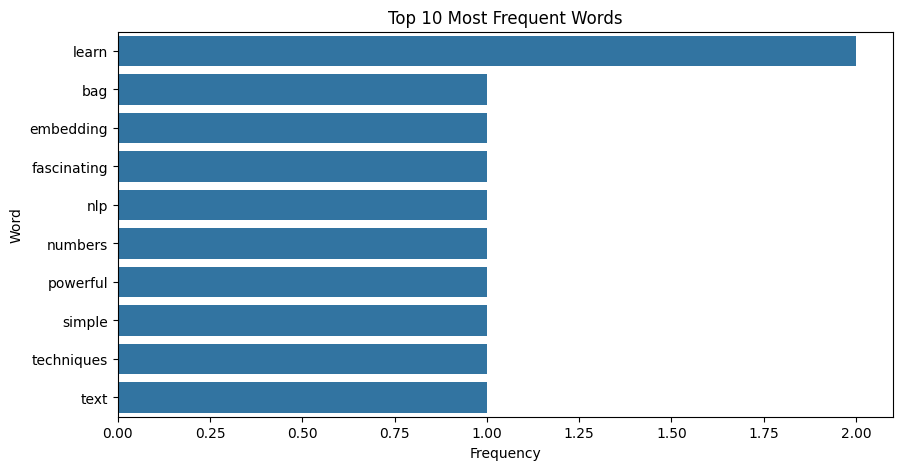

In [7]:
# Visualize word frequencies
# Sum word counts across documents
word_counts = bow_df.sum(axis=0).sort_values(ascending=False)
print("Top Words by Frequency:")
print(word_counts.head(10))

# Plot top words
plt.figure(figsize=(10, 5))
sns.barplot(x=word_counts.head(10).values, y=word_counts.head(10).index)
plt.title("Top 10 Most Frequent Words")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()

# Key Notes:

Sparsity Check:

* High sparsity means most entries are zero (common in text data).

BoW Limitations:

* Loses word order and context.

* Sparse representation (high-dimensional for large vocabularies).

Next Steps:

* TF-IDF: Improves BoW by weighting rare words higher.

* Word Embeddings (Word2Vec, GloVe): Capture semantic meaning.

# 📌 TF-IDF (Term Frequency-Inverse Document Frequency)
* Apply TF-IDF Transformation
* Interpret TF-IDF Scores

In [8]:
# Apply TF-IDF Transformation
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_text'])

# Convert to DataFrame
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=tfidf_vectorizer.get_feature_names_out()
)
print("TF-IDF Matrix:")
print(tfidf_df)

TF-IDF Matrix:
        bag  embedding  fascinating     learn       nlp   numbers  powerful  \
0  0.000000   0.000000     0.622766  0.473630  0.622766  0.000000  0.000000   
1  0.000000   0.447214     0.000000  0.000000  0.000000  0.447214  0.000000   
2  0.467351   0.000000     0.000000  0.355432  0.000000  0.000000  0.467351   

     simple  techniques      text  transform     words  
0  0.000000    0.000000  0.000000   0.000000  0.000000  
1  0.000000    0.447214  0.447214   0.447214  0.000000  
2  0.467351    0.000000  0.000000   0.000000  0.467351  


In [10]:
print(tfidf_vectorizer.get_feature_names_out())

['bag' 'embedding' 'fascinating' 'learn' 'nlp' 'numbers' 'powerful'
 'simple' 'techniques' 'text' 'transform' 'words']


In [9]:
# Take all words in a list and Analyze all the words
word_list = list(tfidf_vectorizer.get_feature_names_out())

# Iterate through the word list and analyze each word if it's in the DataFrame columns
for word in word_list:
    if word in tfidf_df.columns:
        print(f"TF-IDF scores for '{word}':")
        print(tfidf_df[word].describe())
    else:
        print(f"'{word}' not found in TF-IDF matrix columns.")

TF-IDF scores for 'bag':
count    3.000000
mean     0.155784
std      0.269825
min      0.000000
25%      0.000000
50%      0.000000
75%      0.233675
max      0.467351
Name: bag, dtype: float64
TF-IDF scores for 'embedding':
count    3.000000
mean     0.149071
std      0.258199
min      0.000000
25%      0.000000
50%      0.000000
75%      0.223607
max      0.447214
Name: embedding, dtype: float64
TF-IDF scores for 'fascinating':
count    3.000000
mean     0.207589
std      0.359554
min      0.000000
25%      0.000000
50%      0.000000
75%      0.311383
max      0.622766
Name: fascinating, dtype: float64
TF-IDF scores for 'learn':
count    3.000000
mean     0.276354
std      0.246518
min      0.000000
25%      0.177716
50%      0.355432
75%      0.414531
max      0.473630
Name: learn, dtype: float64
TF-IDF scores for 'nlp':
count    3.000000
mean     0.207589
std      0.359554
min      0.000000
25%      0.000000
50%      0.000000
75%      0.311383
max      0.622766
Name: nlp, dtype: f

# 📌 Interpret TF-IDF Scores
* TF (Term Frequency): How often a word appears in a document.

* IDF (Inverse Document Frequency): Penalizes common words (e.g., "the", "is") across all documents.

* **Key Insight**: Words with high TF-IDF scores are both frequent in a document and rare in the corpus.

# 📌 Word2Vec
* Train a Word2Vec Model
* Extract and Visualize Word Vectors

In [10]:
from gensim.models import Word2Vec

# Tokenize sentences
sentences = [text.split() for text in df['processed_text']]

# Train Word2Vec
model_w2v = Word2Vec(
    sentences,
    vector_size=100,  # Embedding dimension
    window=5,         # Context window size
    min_count=1,      # Ignore words with frequency < min_count
    sg=0              # 0 for CBOW, 1 for Skipgram
)

# Save/load model
model_w2v.save("word2vec.model")
# model_w2v = Word2Vec.load("word2vec.model")

# 📌 Extract and visualize vectors

Vector for bag:

[-0.00713902  0.00124103 -0.00717672 -0.00224462  0.0037193   0.00583312
  0.00119818  0.00210273 -0.00411039  0.00722533 -0.00630704  0.00464722
 -0.00821997  0.00203647 -0.00497705 -0.00424769 -0.00310898  0.00565521
  0.0057984  -0.00497465  0.00077333 -0.00849578  0.00780981  0.00925729
 -0.00274233  0.00080022  0.00074665  0.00547788 -0.00860608  0.00058446
  0.00686942  0.00223159  0.00112468 -0.00932216  0.00848237 -0.00626413
 -0.00299237  0.00349379 -0.00077263  0.00141129  0.00178199 -0.0068289
 -0.00972481  0.00904058  0.00619805 -0.00691293  0.00340348  0.00020606
  0.00475375 -0.00711994  0.00402695  0.00434743  0.00995737 -0.00447374
 -0.00138926 -0.00731732 -0.00969783 -0.00908026 -0.00102275 -0.00650329
  0.00484973 -0.00616403  0.00251919  0.00073944 -0.00339215 -0.00097922
  0.00997913  0.00914589 -0.00446183  0.00908303 -0.00564176  0.00593092
 -0.00309722  0.00343175  0.00301723  0.00690046 -0.00237388  0.00877504
  0.00758943 -0.00954765 -0.0080082

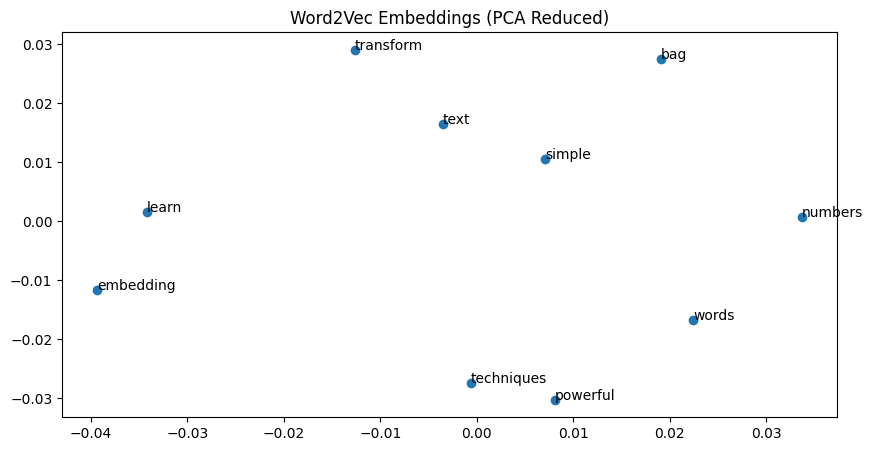

In [11]:
# Get vector for a word
for word in word_list:
  vector = model_w2v.wv[word]  # Replace with a word from your vocab
  print(f"Vector for {word}:\n\n{vector}\n")

# Visualize embeddings (PCA for 2D reduction)
from sklearn.decomposition import PCA

words = list(model_w2v.wv.key_to_index)[:10]  # First 10 words
vectors = [model_w2v.wv[word] for word in words]

# Reduce to 2D
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)

# Plot
plt.figure(figsize=(10, 5))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]))
plt.title("Word2Vec Embeddings (PCA Reduced)")
plt.show()

# 📌 GloVe
* Use Pre-trained GloVe Embeddings

In [17]:
glove_path = "glove.6B.50d.txt"
glove_embeddings = {}
with open(glove_path, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_embeddings[word] = vector

# Example: Get GloVe vector for a word
for word in word_list:
#word = "language"
  if word in glove_embeddings:
    print(f"GloVe vector for '{word}':\n{glove_embeddings[word]}")

In [14]:
# !pip install glove_python
# from glove import Corpus, Glove

# # Create a corpus and train GloVe
# corpus = Corpus()
# corpus.fit(sentences, window=5)
# glove = Glove(no_components=100, learning_rate=0.05)
# glove.fit(corpus.matrix, epochs=30, no_threads=4)
# glove.add_dictionary(corpus.dictionary)

# Removed this cell as glove_python installation failed and is not the intended approach for using pre-trained GloVe.

# 📌 FastText
* Train a FastText Model

In [20]:
from gensim.models import FastText

model_ft = FastText(
    sentences,
    vector_size=100,
    window=5,
    min_count=1,
    sg=0,            # 0 for CBOW, 1 for Skip-gram
    min_n=3,         # Min length of subword
    max_n=6          # Max length of subword
)

# Get vector for a word (including OOV words via subwords)
for word in word_list:
  vector = model_ft.wv[word]
  print(f"FastText vector for {word}:\n\n{vector}\n")

FastText vector for bag:

[-4.74195287e-04 -1.17636730e-04  8.90157651e-04  2.47775839e-04
  1.43164839e-03  3.36289639e-03  3.57584143e-03 -1.17400533e-03
  1.32699835e-03 -1.82306371e-03 -4.86408127e-03  4.43362398e-03
  3.87896638e-04  7.67690144e-05  1.95660442e-03 -3.35708889e-03
  2.02289247e-03 -1.97242619e-03 -2.16779299e-05  6.46800909e-04
  2.94133858e-03  2.90764641e-04  2.30555655e-03  1.14118948e-03
 -1.90835295e-03  6.75281917e-04  6.24727516e-04  1.84786681e-03
 -1.32477446e-03  2.51683919e-03  1.98865822e-03 -3.75488284e-03
 -2.62076478e-03 -3.87655408e-03  1.67648459e-03  2.45511212e-04
 -2.71968369e-04  1.96331716e-03 -8.66644608e-04  8.38027801e-04
 -4.13548667e-03 -6.84100305e-05 -1.98975625e-03  1.11232419e-03
  2.74415850e-03  9.09255992e-04 -2.05717236e-03  7.94398016e-04
  9.17174475e-05 -4.92034422e-04  2.00512377e-03  4.65306314e-03
 -5.52744430e-04 -2.82725808e-03  1.10015142e-04 -1.94981112e-03
 -3.51586053e-03  1.15142949e-03  6.74316325e-05 -1.60976851e-04

# 📌 Comparison of Word2Vec and FastText

In [34]:
# Compare words for an OOV((Out-of-Vocabulary) word
for word in word_list:
 oov_word = word
 print(f"\nWord: {oov_word}")
 print(f"Word2Vec: {model_w2v.wv[oov_word][:4]}")
 print(f"FastText: {model_ft.wv[oov_word][:4]}")  # Works!


Word: bag
Word2Vec: [-0.00713902  0.00124103 -0.00717672 -0.00224462]
FastText: [-0.0004742  -0.00011764  0.00089016  0.00024778]

Word: embedding
Word2Vec: [-0.00515624 -0.00666834 -0.00777684  0.00831073]
FastText: [-0.00016127 -0.00115839  0.00092615  0.00163652]

Word: fascinating
Word2Vec: [0.00977029 0.00816511 0.00128097 0.00509758]
FastText: [-7.4838143e-05 -3.9748626e-04  1.1148439e-03 -1.0896479e-03]

Word: learn
Word2Vec: [-0.00053624  0.00023644  0.00510347  0.00900949]
FastText: [ 3.5656561e-04  3.5938498e-05  1.5484013e-04 -3.2702163e-03]

Word: nlp
Word2Vec: [ 0.0070888  -0.00156793  0.0079475  -0.00948866]
FastText: [ 0.00338626 -0.00184339  0.00307702 -0.00024285]

Word: numbers
Word2Vec: [-0.00872748  0.00213016 -0.00087354 -0.00931909]
FastText: [-0.00179556 -0.00108501  0.00149353  0.00159867]

Word: powerful
Word2Vec: [-0.00861969  0.00366574  0.00518988  0.00574194]
FastText: [0.00023046 0.00144869 0.00067264 0.0013076 ]

Word: simple
Word2Vec: [ 9.4606818e-05  3

# 📌 Inference on comparison with Word2Vec and GloVe
* Advantage: FastText handles out-of-vocabulary (OOV) words by using subword n-grams.